In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
app_bureau_train = pd.read_csv("app_bureau_train.csv")
app_bureau_backtest = pd.read_csv("app_bureau_backtest.csv")
app_bureau_test = pd.read_csv("app_bureau_test.csv")

# 2 Data Treatment
## 2.1 Class Balance

In [2]:
# Examine the Distribution of the Target Column
app_bureau_train['TARGET'].value_counts()

0    22140
1     1283
Name: TARGET, dtype: int64

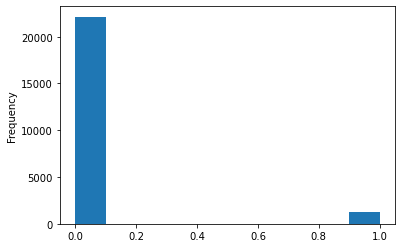

In [3]:
app_bureau_train['TARGET'].astype(int).plot.hist();

From this graph, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. When we devide training and testing data used for model, we will need to split separately such that each target shows up proportionally in the training or testing set.

## 2.2 Missing Values handling

### 2.2.1 Quick Look

In [4]:
# Examine Missing Value
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
# Missing values statistics
missing_values_train = missing_values_table(app_bureau_train)
missing_values_backtest = missing_values_table(app_bureau_backtest)
missing_values_test = missing_values_table(app_bureau_test)
missing_values_train.head(20)

Your selected dataframe has 153 columns.
There are 97 columns that have missing values.
Your selected dataframe has 153 columns.
There are 97 columns that have missing values.
Your selected dataframe has 152 columns.
There are 94 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                    15682               67.0
COMMONAREA_MODE                    15682               67.0
COMMONAREA_AVG                     15682               67.0
NONLIVINGAPARTMENTS_MEDI           15547               66.4
NONLIVINGAPARTMENTS_MODE           15547               66.4
NONLIVINGAPARTMENTS_AVG            15547               66.4
OWN_CAR_AGE                        15354               65.6
LIVINGAPARTMENTS_MEDI              15270               65.2
LIVINGAPARTMENTS_AVG               15270               65.2
LIVINGAPARTMENTS_MODE              15270               65.2
FONDKAPREMONT_MODE                 15232               65.0
FLOORSMIN_MEDI                     15120               64.6
FLOORSMIN_MODE                     15120               64.6
FLOORSMIN_AVG                      15120               64.6
YEARS_BUILD_MEDI                   14765               63.0
YEARS_BUILD_AVG                    14765               63.0
YEARS_BUILD_MODE                   14765               63.0
LANDAREA_MEDI                      12989               55.5
LANDAREA_MODE                      12989               55.5
LANDAREA_AVG                       12989               55.5

In [6]:
missing_values_train.head(40).tail(20)

Missing Values  % of Total Values
BASEMENTAREA_MODE            12772               54.5
BASEMENTAREA_MEDI            12772               54.5
BASEMENTAREA_AVG             12772               54.5
EXT_SOURCE_1                 12299               52.5
NONLIVINGAREA_MEDI           11945               51.0
NONLIVINGAREA_AVG            11945               51.0
NONLIVINGAREA_MODE           11945               51.0
ELEVATORS_MODE               11482               49.0
ELEVATORS_AVG                11482               49.0
ELEVATORS_MEDI               11482               49.0
WALLSMATERIAL_MODE           10925               46.6
APARTMENTS_MODE              10888               46.5
APARTMENTS_AVG               10888               46.5
APARTMENTS_MEDI              10888               46.5
LIVINGAREA_AVG               10791               46.1
LIVINGAREA_MEDI              10791               46.1
LIVINGAREA_MODE              10791               46.1
ENTRANCES_MEDI               10760               45.9
ENTRANCES_AVG                10760               45.9
ENTRANCES_MODE               10760               45.9

In [7]:
missing_values_train.head(60).tail(20)

Missing Values  % of Total Values
HOUSETYPE_MODE                             10737               45.8
FLOORSMAX_MEDI                             10638               45.4
FLOORSMAX_MODE                             10638               45.4
FLOORSMAX_AVG                              10638               45.4
YEARS_BEGINEXPLUATATION_MEDI               10407               44.4
YEARS_BEGINEXPLUATATION_AVG                10407               44.4
YEARS_BEGINEXPLUATATION_MODE               10407               44.4
TOTALAREA_MODE                             10274               43.9
EMERGENCYSTATE_MODE                        10048               42.9
DAYS_ENDDATE_FACT                           6900               29.5
OCCUPATION_TYPE                             6073               25.9
EXT_SOURCE_3                                5020               21.4
DAYS_CREDIT_ENDDATE                         3853               16.4
MONTHS_BALANCE                              3588               15.3
CREDIT_ACTIVE_Closed                        3588               15.3
CREDIT_ACTIVE_Active                        3588               15.3
CREDIT_TYPE_Another type of loan            3588               15.3
CREDIT_ACTIVE_Sold                          3588               15.3
CREDIT_CURRENCY_currency 1                  3588               15.3
CREDIT_CURRENCY_currency 2                  3588               15.3

In [8]:
missing_values_train.head(80).tail(20)

Missing Values  \
CREDIT_CURRENCY_currency 3                                    3588   
CREDIT_CURRENCY_currency 4                                    3588   
CREDIT_TYPE_Microloan                                         3588   
CREDIT_TYPE_Car loan                                          3588   
CREDIT_TYPE_Consumer credit                                   3588   
CREDIT_TYPE_Credit card                                       3588   
CREDIT_TYPE_Loan for business development                     3588   
CREDIT_TYPE_Loan for purchase of shares (margin...            3588   
CREDIT_TYPE_Loan for the purchase of equipment                3588   
CREDIT_TYPE_Loan for working capital replenishment            3588   
CREDIT_TYPE_Real estate loan                                  3588   
CREDIT_TYPE_Mortgage                                          3588   
DAYS_CREDIT_UPDATE                                            3588   
AMT_ANNUITY_BUREAU                                            3588   
CREDIT_TYPE_Unknown type of loan                              3588   
AMT_CREDIT_SUM_OVERDUE                                        3588   
AMT_CREDIT_SUM_LIMIT                                          3588   
AMT_CREDIT_SUM_DEBT                                           3588   
AMT_CREDIT_SUM                                                3588   
CNT_CREDIT_PROLONG                                            3588   

                                                    % of Total Values  
CREDIT_CURRENCY_currency 3                                       15.3  
CREDIT_CURRENCY_currency 4                                       15.3  
CREDIT_TYPE_Microloan                                            15.3  
CREDIT_TYPE_Car loan                                             15.3  
CREDIT_TYPE_Consumer credit                                      15.3  
CREDIT_TYPE_Credit card                                          15.3  
CREDIT_TYPE_Loan for business development                        15.3  
CREDIT_TYPE_Loan for purchase of shares (margin...               15.3  
CREDIT_TYPE_Loan for the purchase of equipment                   15.3  
CREDIT_TYPE_Loan for working capital replenishment               15.3  
CREDIT_TYPE_Real estate loan                                     15.3  
CREDIT_TYPE_Mortgage                                             15.3  
DAYS_CREDIT_UPDATE                                               15.3  
AMT_ANNUITY_BUREAU                                               15.3  
CREDIT_TYPE_Unknown type of loan                                 15.3  
AMT_CREDIT_SUM_OVERDUE                                           15.3  
AMT_CREDIT_SUM_LIMIT                                             15.3  
AMT_CREDIT_SUM_DEBT                                              15.3  
AMT_CREDIT_SUM                                                   15.3  
CNT_CREDIT_PROLONG                                               15.3

In [9]:
missing_values_train.tail(20)

Missing Values  % of Total Values
AMT_CREDIT_SUM_DEBT                   3588               15.3
AMT_CREDIT_SUM                        3588               15.3
CNT_CREDIT_PROLONG                    3588               15.3
AMT_CREDIT_MAX_OVERDUE                3588               15.3
CREDIT_DAY_OVERDUE                    3588               15.3
DAYS_CREDIT                           3588               15.3
AMT_REQ_CREDIT_BUREAU_HOUR            3411               14.6
AMT_REQ_CREDIT_BUREAU_DAY             3411               14.6
AMT_REQ_CREDIT_BUREAU_WEEK            3411               14.6
AMT_REQ_CREDIT_BUREAU_MON             3411               14.6
AMT_REQ_CREDIT_BUREAU_QRT             3411               14.6
AMT_REQ_CREDIT_BUREAU_YEAR            3411               14.6
DEF_60_CNT_SOCIAL_CIRCLE               811                3.5
OBS_60_CNT_SOCIAL_CIRCLE               811                3.5
DEF_30_CNT_SOCIAL_CIRCLE               811                3.5
OBS_30_CNT_SOCIAL_CIRCLE               811                3.5
NAME_TYPE_SUITE                        221                0.9
AMT_GOODS_PRICE                        217                0.9
EXT_SOURCE_2                            47                0.2
CNT_FAM_MEMBERS                          1                0.0

In [10]:
# Columns that are missing values in train but have values in test
set(missing_values_train.index) - set(missing_values_test.index) 

{'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'NAME_TYPE_SUITE'}

These three columns constitute fewer than 1% of the missing data. Will drop the rows missing these columns.

In [11]:
app_bureau_train.dropna(
    subset={'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'NAME_TYPE_SUITE'}, inplace=True)
app_bureau_backtest.dropna(
    subset={'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'NAME_TYPE_SUITE'}, inplace=True)
app_bureau_test.dropna(
    subset={'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'NAME_TYPE_SUITE'}, inplace=True)
app_bureau_train

SK_ID_CURR CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0          184307           M            Y               Y             0   
1          228582           F            Y               Y             1   
2          342012           M            Y               N             1   
3          299158           F            N               Y             0   
4          423647           M            Y               Y             2   
...           ...         ...          ...             ...           ...   
23418      104174           F            N               Y             0   
23419      278612           M            N               Y             1   
23420      408425           M            Y               Y             0   
23421      152969           M            N               Y             0   
23422      219146           M            N               Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              315000.0    180000.0       9000.0         180000.0   
1              180000.0    270000.0      13500.0         270000.0   
2              157500.0    270000.0      13500.0         270000.0   
3              103500.0    270000.0      13500.0         270000.0   
4              112500.0    270000.0      13500.0         270000.0   
...                 ...         ...          ...              ...   
23418          112500.0    180000.0       9000.0         180000.0   
23419          450000.0    900000.0      45000.0         900000.0   
23420          202500.0    225000.0      11250.0         225000.0   
23421          225000.0    315000.0      15750.0         315000.0   
23422          450000.0    180000.0       9000.0         180000.0   

      NAME_TYPE_SUITE  ... CREDIT_TYPE_Credit card  \
0       Unaccompanied  ...                     1.0   
1       Unaccompanied  ...                     0.0   
2       Unaccompanied  ...                     NaN   
3       Unaccompanied  ...                     1.0   
4       Unaccompanied  ...                     0.0   
...               ...  ...                     ...   
23418   Unaccompanied  ...                     1.0   
23419   Unaccompanied  ...                     3.0   
23420   Unaccompanied  ...                     1.0   
23421   Unaccompanied  ...                    12.0   
23422   Unaccompanied  ...                     4.0   

      CREDIT_TYPE_Loan for business development  \
0                                           0.0   
1                                           0.0   
2                                           NaN   
3                                           0.0   
4                                           0.0   
...                                         ...   
23418                                       0.0   
23419                                       0.0   
23420                                       0.0   
23421                                       0.0   
23422                                       0.0   

      CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                    0.0         
1                                                    0.0         
2                                                    NaN         
3                                                    0.0         
4                                                    0.0         
...                                                  ...         
23418                                                0.0         
23419                                                0.0         
23420                                                0.0         
23421                                                0.0         
23422                                                0.0         

      CREDIT_TYPE_Loan for the purchase of equipment  \
0                                                0.0   
1                                                0.0   
2                                         

### 2.2.1 Bureau related columns

For most missing bureau columns, it is probably because the applicant has no credit history yet. We fill with 0.

In [12]:
columns = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY_BUREAU', 'MONTHS_BALANCE', 'CREDIT_ACTIVE_Active',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mortgage',
       'CREDIT_TYPE_Real estate loan', 'CREDIT_TYPE_Unknown type of loan']
app_bureau_train[columns] = app_bureau_train[columns].fillna(0)
app_bureau_backtest[columns] = app_bureau_backtest[columns].fillna(0)
app_bureau_test[columns] = app_bureau_test[columns].fillna(0)

### 2.2.2 Building Related Columns

The missing/filled state for building related columns are inconsistent across applicants. For most variables, over half of the dataset is missing these columns. We decide to drop most building related columns. This is under the reasonable assumption that the building one lives in does not provide enough signal on the financial state of the applicant. There could be hundreds of people living in one condo building whereas only a dozen people living in a duplex. Our correlation analysis below confirms that there is a very weak correlation between FLOORS and TARGET. Therefore, we will keep FLOORSMAX_AVG only.

In [13]:
# Find correlations with the target and sort
correlations = app_bureau_train.corr()['TARGET'].fillna(0).sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.031416
REG_CITY_NOT_WORK_CITY         0.035646
FLAG_WORK_PHONE                0.036342
DAYS_REGISTRATION              0.036943
REG_CITY_NOT_LIVE_CITY         0.041716
OWN_CAR_AGE                    0.046408
REGION_RATING_CLIENT           0.051781
REGION_RATING_CLIENT_W_CITY    0.055434
DAYS_LAST_PHONE_CHANGE         0.060238
DAYS_CREDIT_UPDATE             0.063567
DAYS_ENDDATE_FACT              0.063793
DAYS_BIRTH                     0.069823
DAYS_ID_PUBLISH                0.071105
DAYS_CREDIT                    0.079499
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.148823
EXT_SOURCE_2                 -0.139593
EXT_SOURCE_1                 -0.131724
AMT_CREDIT                   -0.070059
AMT_GOODS_PRICE              -0.069893
AMT_ANNUITY                  -0.066296
FLOORSMAX_AVG                -0.055932
FLOORSMAX_MEDI               -0.055540


In [14]:
BUILDING_COLUMNS = [column for column in app_bureau_train.columns if column != 'FLOORSMAX_AVG' and (
    column.endswith("_MODE") or column.endswith("_AVG") or column.endswith("_MEDI"))]

app_bureau_train.drop(BUILDING_COLUMNS, axis=1, inplace=True)
app_bureau_backtest.drop(BUILDING_COLUMNS, axis=1, inplace=True)
app_bureau_test.drop(BUILDING_COLUMNS, axis=1, inplace=True)
app_bureau_train

SK_ID_CURR CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0          184307           M            Y               Y             0   
1          228582           F            Y               Y             1   
2          342012           M            Y               N             1   
3          299158           F            N               Y             0   
4          423647           M            Y               Y             2   
...           ...         ...          ...             ...           ...   
23418      104174           F            N               Y             0   
23419      278612           M            N               Y             1   
23420      408425           M            Y               Y             0   
23421      152969           M            N               Y             0   
23422      219146           M            N               Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              315000.0    180000.0       9000.0         180000.0   
1              180000.0    270000.0      13500.0         270000.0   
2              157500.0    270000.0      13500.0         270000.0   
3              103500.0    270000.0      13500.0         270000.0   
4              112500.0    270000.0      13500.0         270000.0   
...                 ...         ...          ...              ...   
23418          112500.0    180000.0       9000.0         180000.0   
23419          450000.0    900000.0      45000.0         900000.0   
23420          202500.0    225000.0      11250.0         225000.0   
23421          225000.0    315000.0      15750.0         315000.0   
23422          450000.0    180000.0       9000.0         180000.0   

      NAME_TYPE_SUITE  ... CREDIT_TYPE_Credit card  \
0       Unaccompanied  ...                     1.0   
1       Unaccompanied  ...                     0.0   
2       Unaccompanied  ...                     0.0   
3       Unaccompanied  ...                     1.0   
4       Unaccompanied  ...                     0.0   
...               ...  ...                     ...   
23418   Unaccompanied  ...                     1.0   
23419   Unaccompanied  ...                     3.0   
23420   Unaccompanied  ...                     1.0   
23421   Unaccompanied  ...                    12.0   
23422   Unaccompanied  ...                     4.0   

      CREDIT_TYPE_Loan for business development  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
23418                                       0.0   
23419                                       0.0   
23420                                       0.0   
23421                                       0.0   
23422                                       0.0   

      CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                    0.0         
1                                                    0.0         
2                                                    0.0         
3                                                    0.0         
4                                                    0.0         
...                                                  ...         
23418                                                0.0         
23419                                                0.0         
23420                                                0.0         
23421                                                0.0         
23422                                                0.0         

      CREDIT_TYPE_Loan for the purchase of equipment  \
0                                                0.0   
1                                                0.0   
2                                         

### 2.2.3 Other deterministic fills

We have also decided to fill these missing values with deterministic values:
	
OBS_30/60_CNT_SOCIAL_CIRCLE <- 0: no defaults observed

DEF_30/60_CNT_SOCIAL_CIRCLE <- 0: no defaults observed

AMT_REQ_CREDIT_BUREAU_* <- 0: no previous credit enquiries

OWN_CAR_AGE: 0 <-: does not own a car

In [15]:
columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','OWN_CAR_AGE']

app_bureau_train.loc[:, columns] = app_bureau_train.loc[:, columns].fillna(0)
app_bureau_backtest.loc[:, columns] = app_bureau_backtest.loc[:, columns].fillna(0)
app_bureau_test.loc[:, columns] = app_bureau_test.loc[:, columns].fillna(0)

app_bureau_train[columns]

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                           0.0                       0.0   
1                           2.0                       2.0   
2                           1.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
23418                       0.0                       0.0   
23419                       0.0                       0.0   
23420                       1.0                       0.0   
23421                       1.0                       1.0   
23422                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                           0.0                       0.0   
1                           2.0                       1.0   
2                           1.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
23418                       0.0                       0.0   
23419                       0.0                       0.0   
23420                       1.0                       0.0   
23421                       1.0                       1.0   
23422                       0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
23418                         0.0                        0.0   
23419                         0.0                        0.0   
23420                         0.0                        0.0   
23421                         0.0                        0.0   
23422                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             1.0                        0.0   
...                           ...                        ...   
23418                         0.0                        0.0   
23419                         1.0                        0.0   
23420                         0.0                        0.0   
23421                         0.0                        1.0   
23422                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  OWN_CAR_AGE  
0                            0.0                         3.0          9.0  
1                            0.0                         5.0          9.0  
2                            0.0                         0.0          5.0  
3                            1.0                         0.0          0.0  
4                            0.0                         1.0         15.0  
...                          ...                         ...          ...  
23418                        0.0                         1.0          0.0  
23419                        0.0                         1.0          0.0  
23420                        0.0                         1.0          8.0  
23421                        0.0                         3.0          0.0  
23422                        0.0                         2.0          0.0  

[23202 rows x 11 columns]

For those categorical variables with missing values:

OCCUPATION_TYPE: fill with the value "Missing" since there may be a commonality among those who are not willing to disclose occupation

In [16]:
app_bureau_train.OCCUPATION_TYPE.fillna("Missing", inplace=True)
app_bureau_backtest.OCCUPATION_TYPE.fillna("Missing", inplace=True)
app_bureau_test.OCCUPATION_TYPE.fillna("Missing", inplace=True)

app_bureau_train.OCCUPATION_TYPE.value_counts()

Missing                  6028
Laborers                 3977
Sales staff              2821
Core staff               2546
Managers                 2070
High skill tech staff    1107
Drivers                  1067
Accountants               960
Medicine staff            625
Security staff            421
Cooking staff             420
Cleaning staff            339
Private service staff     227
Waiters/barmen staff      137
Low-skill Laborers        132
Secretaries               116
IT staff                   79
HR staff                   71
Realty agents              59
Name: OCCUPATION_TYPE, dtype: int64

For the EXT_SOURCE_* (* = 1,2,3) columns with missing values, we believe there is a meaning in them being missing: the applicant either has not fallen under the radar of external vendors, or they are simply new to the credit market such that the vendors have not picked them up. We will make a new boolean column EXT_SOURCE_EXIST_* for each EXT_SOURCE_* to indicate missing, and fill the missing values in the original columns with 0.

In [17]:
app_bureau_train = pd.concat([app_bureau_train,pd.isna(app_bureau_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]).rename({
    "EXT_SOURCE_1":"EXT_SOURCE_EXIST_1",
    "EXT_SOURCE_2":"EXT_SOURCE_EXIST_2",
    "EXT_SOURCE_3":"EXT_SOURCE_EXIST_3",
},axis=1)],axis=1)
app_bureau_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]] = app_bureau_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].fillna(0)

app_bureau_backtest = pd.concat([app_bureau_backtest,pd.isna(app_bureau_backtest[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]).rename({
    "EXT_SOURCE_1":"EXT_SOURCE_EXIST_1",
    "EXT_SOURCE_2":"EXT_SOURCE_EXIST_2",
    "EXT_SOURCE_3":"EXT_SOURCE_EXIST_3",
},axis=1)],axis=1)
app_bureau_backtest[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]] = app_bureau_backtest[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].fillna(0)

app_bureau_test = pd.concat([app_bureau_test,pd.isna(app_bureau_test[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]).rename({
    "EXT_SOURCE_1":"EXT_SOURCE_EXIST_1",
    "EXT_SOURCE_2":"EXT_SOURCE_EXIST_2",
    "EXT_SOURCE_3":"EXT_SOURCE_EXIST_3",
},axis=1)],axis=1)
app_bureau_test[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]] = app_bureau_test[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]].fillna(0)

app_bureau_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","EXT_SOURCE_EXIST_1","EXT_SOURCE_EXIST_2","EXT_SOURCE_EXIST_3"]]


EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_EXIST_1  \
0          0.383802      0.466551      0.123735               False   
1          0.449969      0.349552      0.474051               False   
2          0.180103      0.616436      0.000000               False   
3          0.000000      0.648480      0.488455                True   
4          0.171242      0.729463      0.468660               False   
...             ...           ...           ...                 ...   
23418      0.000000      0.199389      0.454321                True   
23419      0.883157      0.623540      0.499272               False   
23420      0.000000      0.694862      0.605836                True   
23421      0.622144      0.551054      0.202087               False   
23422      0.000000      0.717708      0.576209                True   

       EXT_SOURCE_EXIST_2  EXT_SOURCE_EXIST_3  
0                   False               False  
1                   False               False  
2                   False                True  
3                   False               False  
4                   False               False  
...                   ...                 ...  
23418               False               False  
23419               False               False  
23420               False               False  
23421               False               False  
23422               False               False  

[23202 rows x 6 columns]

## 2.3 Anomalies

In [18]:
family_12_childID = 298322
Obs_many_social_default_ID = 272071

We decide to drop ID 298322 because the family has 12 children, which seems abnormal and is the only entry like this in the dataset. We also decide to drop ID 272071 because it has too many observation of client's social surroundings with 30/60 DPD default (300+), possibly due to technical errors.

We also decide to drop columns FLAG_DOCUMENT_2,FLAG_DOCUMENT_12, and FLAG_DOCUMENT_20 because none of the applicants provided these documents.

In [19]:
app_bureau_train.set_index("SK_ID_CURR", inplace=True)
app_bureau_train.drop([family_12_childID, Obs_many_social_default_ID], inplace=True)
app_bureau_train.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_12", "FLAG_DOCUMENT_20"], axis=1, inplace=True)

app_bureau_backtest.set_index("SK_ID_CURR", inplace=True)
app_bureau_backtest.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_12", "FLAG_DOCUMENT_20"], axis=1, inplace=True)

app_bureau_test.set_index("SK_ID_CURR", inplace=True)
app_bureau_test.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_12", "FLAG_DOCUMENT_20"], axis=1, inplace=True)

app_bureau_train

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                          
184307               M            Y               Y             0   
228582               F            Y               Y             1   
342012               M            Y               N             1   
299158               F            N               Y             0   
423647               M            Y               Y             2   
...                ...          ...             ...           ...   
104174               F            N               Y             0   
278612               M            N               Y             1   
408425               M            Y               Y             0   
152969               M            N               Y             0   
219146               M            N               Y             0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
184307              315000.0    180000.0       9000.0         180000.0   
228582              180000.0    270000.0      13500.0         270000.0   
342012              157500.0    270000.0      13500.0         270000.0   
299158              103500.0    270000.0      13500.0         270000.0   
423647              112500.0    270000.0      13500.0         270000.0   
...                      ...         ...          ...              ...   
104174              112500.0    180000.0       9000.0         180000.0   
278612              450000.0    900000.0      45000.0         900000.0   
408425              202500.0    225000.0      11250.0         225000.0   
152969              225000.0    315000.0      15750.0         315000.0   
219146              450000.0    180000.0       9000.0         180000.0   

           NAME_TYPE_SUITE      NAME_INCOME_TYPE  ...  \
SK_ID_CURR                                        ...   
184307       Unaccompanied               Working  ...   
228582       Unaccompanied               Working  ...   
342012       Unaccompanied  Commercial associate  ...   
299158       Unaccompanied               Working  ...   
423647       Unaccompanied               Working  ...   
...                    ...                   ...  ...   
104174       Unaccompanied               Working  ...   
278612       Unaccompanied               Working  ...   
408425       Unaccompanied         State servant  ...   
152969       Unaccompanied  Commercial associate  ...   
219146       Unaccompanied  Commercial associate  ...   

           CREDIT_TYPE_Loan for the purchase of equipment  \
SK_ID_CURR                                                  
184307                                                0.0   
228582                                                0.0   
342012                                                0.0   
299158                                                0.0   
423647                                                0.0   
...                                                   ...   
104174                                                0.0   
278612                                                0.0   
408425                                                0.0   
152969                                                0.0   
219146                                                0.0   

           CREDIT_TYPE_Loan for working capital replenishment  \
SK_ID_CURR                                                      
184307                                                    0.0   
228582                                                    0.0   
342012                                                    0.0   
299158                                                    0.0   
423647                                                    0.0   
...                                                       ...   
104174                                                    0.0   
278612                       

## 2.4 Imputation

### 2.4.1 FLOORSMAX_AVG

Almost half of FLOORSMAX_AVG is missing for the dataset. We need to find some proxy for the missing values such that they would be still useful for the model.

In [20]:
print(pd.isna(app_bureau_train.REGION_POPULATION_RELATIVE).mean(), "REGION_POPULATION_RELATIVE Missing")
app_bureau_train.corr()["FLOORSMAX_AVG"].sort_values()

0.0 REGION_POPULATION_RELATIVE Missing


REGION_RATING_CLIENT_W_CITY                      -0.282111
REGION_RATING_CLIENT                             -0.267332
REG_CITY_NOT_WORK_CITY                           -0.119708
LIVE_CITY_NOT_WORK_CITY                          -0.092838
REG_CITY_NOT_LIVE_CITY                           -0.078681
                                                    ...   
REGION_POPULATION_RELATIVE                        0.363527
FLOORSMAX_AVG                                     1.000000
FLAG_MOBIL                                             NaN
MONTHS_BALANCE                                         NaN
CREDIT_TYPE_Loan for the purchase of equipment         NaN
Name: FLOORSMAX_AVG, Length: 95, dtype: float64

We found a reasonably good proxy REGION_POPULATION_RELATIVE that is present for 100% of the dataset. We will sort the dataset by REGION_POPULATION_RELATIVE, and use backfill and forward-fill for missing FLOORSMAX_AVG, and take the average.

In [21]:
backfilled = app_bureau_train.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="bfill")
forwardfilled = app_bureau_train.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="ffill")
app_bureau_train["FLOORSMAX_AVG"] = pd.concat([backfilled,forwardfilled], axis=1).mean(axis=1).loc[app_bureau_train.index]

backfilled = app_bureau_backtest.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="bfill")
forwardfilled = app_bureau_backtest.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="ffill")
app_bureau_backtest["FLOORSMAX_AVG"] = pd.concat([backfilled,forwardfilled], axis=1).mean(axis=1).loc[app_bureau_backtest.index]

backfilled = app_bureau_test.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="bfill")
forwardfilled = app_bureau_test.sort_values("REGION_POPULATION_RELATIVE")["FLOORSMAX_AVG"].fillna(method="ffill")
app_bureau_test["FLOORSMAX_AVG"] = pd.concat([backfilled,forwardfilled], axis=1).mean(axis=1).loc[app_bureau_test.index]

We should not see any missing values now

In [22]:
missing_values_table(app_bureau_train)
missing_values_table(app_bureau_backtest)
missing_values_table(app_bureau_test)

Your selected dataframe has 106 columns.
There are 0 columns that have missing values.
Your selected dataframe has 106 columns.
There are 0 columns that have missing values.
Your selected dataframe has 105 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### 2.4.2 DAYS_EMPLOYED
We also noticed a few (~10%) applicates with a positive DAYS_EMPLOYED (should be negative because it's days from the application date). We try to see if these applicates have a significant difference in loan default rate:

In [23]:
ANOM_DAYS_EMPLOYED = 365243
anom = app_bureau_train[app_bureau_train['DAYS_EMPLOYED'] == ANOM_DAYS_EMPLOYED]
non_anom = app_bureau_train[app_bureau_train['DAYS_EMPLOYED'] != ANOM_DAYS_EMPLOYED]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('The non-anomalies default rate standard deviation is %0.2f%%' % (100 * non_anom['TARGET'].std()))
print('The anomalies default rate standard deviation is %0.2f%%' % (100 * anom['TARGET'].std()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 5.64% of loans
The anomalies default on 4.12% of loans
The non-anomalies default rate standard deviation is 23.07%
The anomalies default rate standard deviation is 19.89%
There are 2668 anomalous days of employment


Given the small sample size of 2668 and large standard deviation, we are unable to conclude that there is a significant difference in the default rate if an applicant falls in the "positive DAYS_EMPLOYED" group. Therefore, we decide to inpute those 2668 applicant with the mean DAYS_EMPLOYED among those with a similar age.

There is only one applicant with age 70 and 66 which is in the anomalies group. Since they are probably retired anyways, we will fill with the mean value of those above 60.

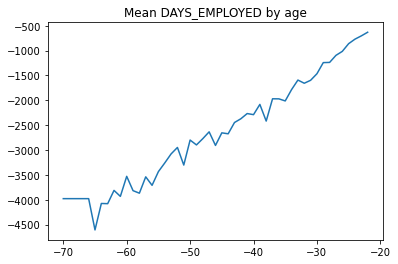

In [24]:
DAYS_EMPOYED_MEAN_BY_AGE = app_bureau_train['DAYS_EMPLOYED'].replace(ANOM_DAYS_EMPLOYED,np.nan).groupby(
    (lambda i: app_bureau_train["DAYS_BIRTH"][i]//365)).mean().round(0)
DAYS_EMPOYED_MEAN_BY_AGE.loc[-70] = DAYS_EMPOYED_MEAN_BY_AGE.loc[-65:-59].mean()
DAYS_EMPOYED_MEAN_BY_AGE.loc[-66] = DAYS_EMPOYED_MEAN_BY_AGE.loc[-65:-59].mean()
DAYS_EMPOYED_MEAN_BY_AGE = DAYS_EMPOYED_MEAN_BY_AGE.astype(int)
DAYS_EMPOYED_MEAN_BY_AGE.plot(title="Mean DAYS_EMPLOYED by age")

In [25]:
app_bureau_train['DAYS_EMPLOYED_IMPUTED'] = app_bureau_train.apply(
    lambda row: DAYS_EMPOYED_MEAN_BY_AGE[row['DAYS_BIRTH']//365] 
    if row['DAYS_EMPLOYED'] == ANOM_DAYS_EMPLOYED
    else row['DAYS_EMPLOYED'],axis=1)
app_bureau_backtest['DAYS_EMPLOYED_IMPUTED'] = app_bureau_backtest.apply(
    lambda row: DAYS_EMPOYED_MEAN_BY_AGE[row['DAYS_BIRTH']//365] 
    if row['DAYS_EMPLOYED'] == ANOM_DAYS_EMPLOYED
    else row['DAYS_EMPLOYED'],axis=1)
app_bureau_test['DAYS_EMPLOYED_IMPUTED'] = app_bureau_test.apply(
    lambda row: DAYS_EMPOYED_MEAN_BY_AGE[row['DAYS_BIRTH']//365] 
    if row['DAYS_EMPLOYED'] == ANOM_DAYS_EMPLOYED
    else row['DAYS_EMPLOYED'],axis=1)
app_bureau_train[['DAYS_EMPLOYED_IMPUTED','DAYS_EMPLOYED']].describe()

DAYS_EMPLOYED_IMPUTED  DAYS_EMPLOYED
count           23200.000000   23200.000000
mean            -2316.583836   40116.869181
std              2149.816290  117221.416786
min            -16236.000000  -16236.000000
25%             -3530.000000   -2579.000000
50%             -1643.500000   -1159.000000
75%              -741.000000    -410.000000
max                -3.000000  365243.000000

In [26]:
# the original columns are no longer needed
app_bureau_train.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)
app_bureau_backtest.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)
app_bureau_test.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

## 2.5 Categorical Variables

In [27]:
app_bureau_train.drop(app_bureau_train.describe().columns, axis=1) # categorical columns

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
SK_ID_CURR                                                            
184307               M            Y               Y   Unaccompanied   
228582               F            Y               Y   Unaccompanied   
342012               M            Y               N   Unaccompanied   
299158               F            N               Y   Unaccompanied   
423647               M            Y               Y   Unaccompanied   
...                ...          ...             ...             ...   
104174               F            N               Y   Unaccompanied   
278612               M            N               Y   Unaccompanied   
408425               M            Y               Y   Unaccompanied   
152969               M            N               Y   Unaccompanied   
219146               M            N               Y   Unaccompanied   

                NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                        
184307                   Working               Higher education   
228582                   Working               Higher education   
342012      Commercial associate  Secondary / secondary special   
299158                   Working  Secondary / secondary special   
423647                   Working  Secondary / secondary special   
...                          ...                            ...   
104174                   Working               Higher education   
278612                   Working               Higher education   
408425             State servant               Higher education   
152969      Commercial associate  Secondary / secondary special   
219146      Commercial associate               Higher education   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
SK_ID_CURR                                                            
184307                   Married  House / apartment     Sales staff   
228582                   Married  House / apartment        Laborers   
342012                   Married  House / apartment        Laborers   
299158                   Married  House / apartment      Core staff   
423647                   Married  House / apartment        Laborers   
...                          ...                ...             ...   
104174      Single / not married  House / apartment     Sales staff   
278612                   Married  House / apartment      Core staff   
408425                   Married  House / apartment      Core staff   
152969                 Separated  House / apartment         Missing   
219146      Single / not married  House / apartment        Laborers   

           WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
SK_ID_CURR                                                      
184307                        TUESDAY        Industry: type 3   
228582                       SATURDAY             Advertising   
342012                        TUESDAY  Business Entity Type 2   
299158                       SATURDAY            Kindergarten   
423647                        TUESDAY       Transport: type 2   
...                               ...                     ...   
104174                         MONDAY           Trade: type 3   
278612                         MONDAY  Business Entity Type 3   
408425                        TUESDAY                  Police   
152969                        TUESDAY  Business Entity Type 3   
219146                       THURSDAY  Business Entity Type 3   

            EXT_SOURCE_EXIST_1  EXT_SOURCE_EXIST_2  EXT_SOURCE_EXIST_3  
SK_ID_CURR                                                              
184307                   False               False               False  
228582                   False               False               False  
342012                   False               False                True  
299158                    True               False               False  
423647 

Use boolean to encode those columns with only two possibile values

In [28]:
app_bureau_train["FLAG_OWN_CAR_BINARY"] = app_bureau_train.FLAG_OWN_CAR == "Y"
app_bureau_train["FLAG_OWN_REALTY_BINARY"] = app_bureau_train.FLAG_OWN_REALTY == "Y"

app_bureau_backtest["FLAG_OWN_CAR_BINARY"] = app_bureau_backtest.FLAG_OWN_CAR == "Y"
app_bureau_backtest["FLAG_OWN_REALTY_BINARY"] = app_bureau_backtest.FLAG_OWN_REALTY == "Y"

app_bureau_test["FLAG_OWN_CAR_BINARY"] = app_bureau_test.FLAG_OWN_CAR == "Y"
app_bureau_test["FLAG_OWN_REALTY_BINARY"] = app_bureau_test.FLAG_OWN_REALTY == "Y"

# the original columns are no longer needed
app_bureau_train.drop(['FLAG_OWN_CAR'], axis=1, inplace=True)
app_bureau_backtest.drop(['FLAG_OWN_CAR'], axis=1, inplace=True)
app_bureau_test.drop(['FLAG_OWN_CAR'], axis=1, inplace=True)

app_bureau_train.drop(['FLAG_OWN_REALTY'], axis=1, inplace=True)
app_bureau_backtest.drop(['FLAG_OWN_REALTY'], axis=1, inplace=True)
app_bureau_test.drop(['FLAG_OWN_REALTY'], axis=1, inplace=True)

In [29]:
app_bureau_train.shape,app_bureau_backtest.shape, app_bureau_test.shape

((23200, 106), (5792, 106), (439, 105))

Use one-hot encoding to expand the rest of categorical variables. Note that we do this for the combined training and test set so we don't miss any values

In [30]:
multi_cat_cols = [
    "CODE_GENDER","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START","ORGANIZATION_TYPE"]
one_hot = pd.get_dummies(pd.concat([
    app_bureau_train.drop(["TARGET"], axis=1),
    app_bureau_backtest.drop(["TARGET"], axis=1),
    app_bureau_test],axis=0)[multi_cat_cols])
one_hot_train, one_hot_backtest, one_hot_test = (
    one_hot.iloc[:app_bureau_train.shape[0],:],
    one_hot.iloc[app_bureau_train.shape[0]:app_bureau_train.shape[0]+app_bureau_backtest.shape[0],:],
    one_hot.iloc[app_bureau_train.shape[0]+app_bureau_backtest.shape[0]:,:])
one_hot_train

CODE_GENDER_F  CODE_GENDER_M  CODE_GENDER_XNA  \
SK_ID_CURR                                                  
184307                  0              1                0   
228582                  1              0                0   
342012                  0              1                0   
299158                  1              0                0   
423647                  0              1                0   
...                   ...            ...              ...   
104174                  1              0                0   
278612                  0              1                0   
408425                  0              1                0   
152969                  0              1                0   
219146                  0              1                0   

            NAME_TYPE_SUITE_Children  NAME_TYPE_SUITE_Family  \
SK_ID_CURR                                                     
184307                             0                       0   
228582                             0                       0   
342012                             0                       0   
299158                             0                       0   
423647                             0                       0   
...                              ...                     ...   
104174                             0                       0   
278612                             0                       0   
408425                             0                       0   
152969                             0                       0   
219146                             0                       0   

            NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  \
SK_ID_CURR                                                             
184307                                    0                        0   
228582                                    0                        0   
342012                                    0                        0   
299158                                    0                        0   
423647                                    0                        0   
...                                     ...                      ...   
104174                                    0                        0   
278612                                    0                        0   
408425                                    0                        0   
152969                                    0                        0   
219146                                    0                        0   

            NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spouse, partner  \
SK_ID_CURR                                                             
184307                            0                                0   
228582                            0                                0   
342012                            0                                0   
299158                            0                                0   
423647                            0                                0   
...                             ...                              ...   
104174                            0                                0   
278612                            0                                0   
408425                            0                                0   
152969                            0                                0   
219146                            0                                0   

            NAME_TYPE_SUITE_Unaccompanied  ...  \
SK_ID_CURR                                 ...   
184307                                  1  ...   
228582                                  1  ...   
342012                                  1  ...   
299158                                  1  ...   
423647                                  1  ...   
...                                   ...  ...   
104174                                  1  ...   
278612                                  1  ...   
408425     

## 2.6 Final Training & Testing set

In [31]:
# Thus we have arrived at the final, cleaned and treated training and testing set
data_train = pd.concat([app_bureau_train.drop(multi_cat_cols, axis=1),one_hot_train],axis=1)
data_backtest = pd.concat([app_bureau_backtest.drop(multi_cat_cols, axis=1),one_hot_backtest],axis=1)
data_test = pd.concat([app_bureau_test.drop(multi_cat_cols, axis=1),one_hot_test],axis=1)

In [32]:
data_train.to_csv("train80.csv")
data_backtest.to_csv("train20.csv")
data_test.to_csv("test.csv")